In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Discos de Greschgorin

**Teorema 1: Discos de Greschgorin.** Todos los valores propios de una matriz $A\in\mathbb{R}^{d\times d}$ están localizados en el conjunto $$⋃_{i=1}^{d}Γ_{i}$$ con $$Γ_{i}  = \{z\in ℂ : |z-a_{ii}|\leq R_{i}\}$$
y $a_{ii}$ es la entrada (i,i) de la diagonal de la matriz $A$ y $R_i = \sum_{j=1 ,j\not=i}^{d}|a_{ij}|$.

**Demostración.** Para $λ$ un valor propio de $A$ considere un vector propio $x$ y sea $m$ el índice del componente del vector con norma mayor, ahora considere el vector $y = x/|x_m|$, así, $y$ también es un vector propio de $A$ asociado a $λ$ con $|y_m| = 1$ y $|y_i|\leq 1$ para todo $i$. Puesto que $Ay = \lambda y$ entonces
$$
\sum^{d}_{k=1} a_{mk}y_k = λ y_m
$$
luego
$$
y_{m}(\lambda - a_{mm}) =  \sum^{d}_{k=1, ~ k\not=m} a_{mk}y_k
$$
usando las propiedades del vector $y$, concluimos que
$$
|\lambda - a_{mm}| \leq \sum^{d}_{k=1, ~ k\not=m} |a_{mk}||y_k| \leq  \sum^{d}_{k=1, ~ k\not=m} |a_{mk}| \text{.}
$$

A =  [[ 0.61600295  0.50893035  0.09660134]
 [-0.49605616 -0.66543654  0.3347519 ]
 [-0.40714439  0.48252749 -0.20811519]]
Valores propios de A =  [ 0.29146456+0.36827461j  0.29146456-0.36827461j -0.84047789+0.j        ]


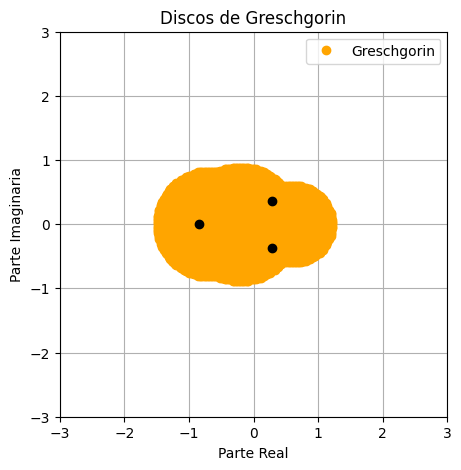

In [ ]:
def allGreschdisksforA(A,r=10,k=100):
  rango = np.linspace(-r,r,k)
  n = A.shape[0]
  D = np.diag(A)
  R = np.zeros(n)
  for i in range(n):
    R[i] = np.sum(abs(A[i,:]))-abs(A[i,i])

  valores = np.array([[x + y*1j for x in rango] for y in rango])

  resultadoG = []


  for p in range(n):
    m = lambda z: (np.abs(z-A[p,p])<=R[p])
    for i in range(k):
      for j in range(k):
        if m(valores[i,j]) == True:
          resultadoG.append(valores[i,j])


  E = np.linalg.eigvals(A)

  plt.figure(figsize=(5,5))
  plt.plot(np.real(resultadoG),np.imag(resultadoG),'o',color='orange',label="Greschgorin")
  plt.plot(np.real(E),np.imag(E),'ko',linewidth = 1.5)

  plt.xlim(-r,r)
  plt.ylim(-r,r)
  plt.xlabel('Parte Real')
  plt.ylabel('Parte Imaginaria')
  plt.title('Discos de Greschgorin')
  plt.legend()
  plt.grid(True)
  plt.show()

#Ejemplo
A = 2*np.random.random((3,3))-1
print('A = ',A)
print('Valores propios de A = ',np.linalg.eigvals(A))
allGreschdisksforA(A,3,250)

**Corolario 2.** Toda matriz estrictamente diagonal dominante es invertible.

A =  [[ 2.21029692 -0.7536523  -0.99729499]
 [-0.02066997 -3.26099896  0.79640269]
 [-0.85887214  0.39190808  3.69433726]]
Valores propios de A =  [ 4.20197944  1.7373028  -3.29564702]


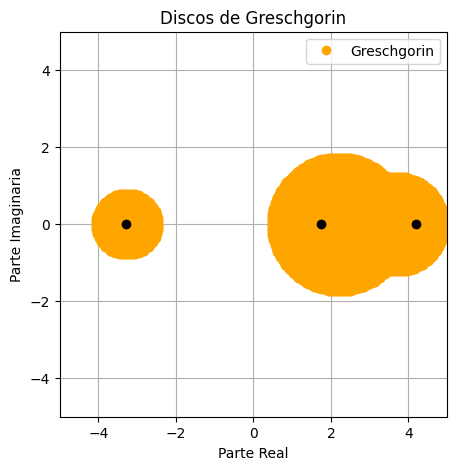

In [ ]:
A = (2*np.random.random((3,3))-1) + 3*np.diag([1,-1,1])
print('A = ',A)
print('Valores propios de A = ',np.linalg.eigvals(A))

allGreschdisksforA(A,5,300)

**Corolario 3.** Si $\lambda \in ℂ$ es un valor propio de una matriz $A\in\mathbb{R}^{d\times d}$ entonces $\lambda$ pertenece al disco $$D\left(0,{max}_{1\leq i \leq d}(|a_{ii}|) + {max}_{1\leq i \leq d}{\sum^{d}_{j=1 ~ j\not = i}}|a_{ij}|\right)$$
donde $a_{ij}$ es la entrada $(i,j)$ de la matriz $A$.


**Teorema 4: Discos de Brauer.** Todos los valores propios de una matriz $A\in\mathbb{R}^{d\times d}$ están contenidos en la unión de $\binom{d}{2}$ conjuntos
$$⋃_{i<j} B_{ij} $$
donde
$$B_{ij} = \{z\in ℂ : |z-a_{ii}||z-a_{jj}|\leq R_{i}R_{j}\}$$

**Teorema 5: Discos generalizados de Greschgorin.** Todos los valores propios de una matriz $A\in\mathbb{R}^{d\times d}$ están contenidos en la unión de los siguientes conjuntos
$$
\Omega_{ij} = \{z\in ℂ : |(z-a_{ii})(z-a_{jj})-a_{ij}a_{ji}|\leq |z-a_{jj}|R_{ij}+|a_{ij}|R_{ji}\}
$$
donde $R_{ij} = \sum_{k=1, k\not=i,j}^{d}|a_{ik}|$.

In [ ]:
def alldisksforA(A,r=10,k=100):
  rango = np.linspace(-r,r,k)
  n = A.shape[0]
  D = np.diag(A)
  R = np.zeros(n)
  Rpp = np.zeros((n,n))
  for i in range(n):
    R[i] = np.sum(abs(A[i,:]))-abs(A[i,i])
    for j in range(n):
      Rpp[i,j] = np.sum(abs(A[i,:])) - abs(A[i,i])-abs(A[i,j])
  #print("R = ",R)
  #print("Rpp = ",Rpp)
  valores = np.array([[x + y*1j for x in rango] for y in rango])

  resultadoG = []
  resultadoB = []
  resultadoO = []

  for p in range(n):
    m = lambda z: (np.abs(z-A[p,p])<=R[p])
    for i in range(k):
      for j in range(k):
        if m(valores[i,j]) == True:
          resultadoG.append(valores[i,j])

  for u in range(n):
    for v in range(n):
      if u!=v :
        m1 = lambda z: (np.abs(z-A[u,u])*np.abs(z-A[v,v])<=R[u]*R[v])
        m2 = lambda z: np.abs((z-A[u,u])*(z-A[v,v])-A[u,v]*A[v,u])<=Rpp[u,v]*np.abs(z-A[v,v]) +A[u,v]*Rpp[v,u]
        for i in range(k):
          for j in range(k):
            if m1(valores[i,j]) == True:
              resultadoB.append(valores[i,j])
            if m2(valores[i,j]) == True:
              resultadoO.append(valores[i,j])



  E = np.linalg.eigvals(A)

  plt.figure(figsize=(5,5))
  plt.plot(np.real(resultadoG),np.imag(resultadoG),'o',color='blue',label="Greschgorin")
  plt.plot(np.real(resultadoB),np.imag(resultadoB),'o',color='deepskyblue',label="Brauer")
  plt.plot(np.real(resultadoO),np.imag(resultadoO),'o',color='cyan',label="General Greschgorin")
  plt.plot(np.real(E),np.imag(E),'ko',linewidth = 1.5)

  plt.xlim(-r,r)
  plt.ylim(-r,r)
  plt.xlabel('Parte Real')
  plt.ylabel('Parte Imaginaria')
  plt.title('Región en el Plano Complejo')
  plt.legend()
  plt.grid(True)
  plt.show()

[[ 0.60878749  0.47651823 -0.66924419]
 [ 0.13095843 -0.99072716 -0.90327975]
 [ 0.8460792  -0.46858696  0.84601857]]


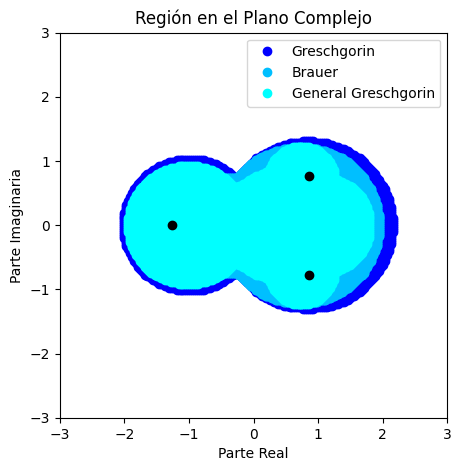

In [ ]:
A = 2*np.random.random((3,3))-1
print(A)
alldisksforA(A,3,200)

[[-7  1  6 -7 -6  7 -4]
 [ 0 -5  3 -7 -1 -3 -6]
 [ 1 -6 -6  6  1 -7  1]
 [-5 -5  3  0 -6  6  0]
 [-6  1 -7 -1  7  6  4]
 [ 5  3  2  0  3  4 -3]
 [ 2 -3  4  7  1  1 -6]]


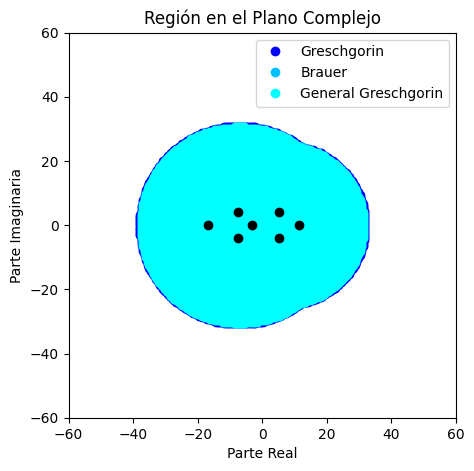

In [ ]:
A = np.random.randint(-7,7+1,(7,7))
print(A)
alldisksforA(A,60,250)

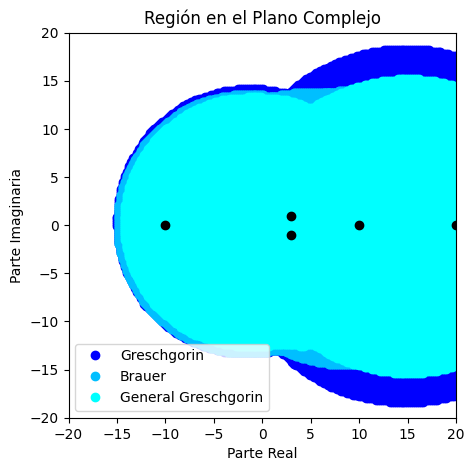

In [ ]:
Q,R = np.linalg.qr(np.random.randint(-2,2+1,(5,5)))
alldisksforA(Q @ np.diag(np.array([-10,3+1*1j,3-1*1j,10,20])) @ Q.T,20,200)

Hagamos el análisis para una matriz particular. Considere la siguiente matriz
$$
A = \begin{pmatrix}
1 & 0 & 1 \\
0 & 2 & 0 \\
1 & 1 & 0
\end{pmatrix}
$$
El polinomio característico es $p_{A}(λ) = -\lambda ^3 + 3 \lambda^2 -\lambda -2$ y sus valores propios son $\{\frac{1}{2}(1-\sqrt{5}),\frac{1}{2}(1+\sqrt{5}),2\}$.

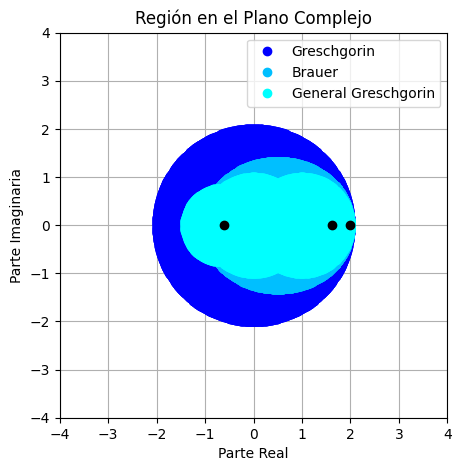

In [ ]:
A = np.array([[1,0,1],[0,2,0],[1,1,0]])
alldisksforA(A,4,750)

Las desigualdades correspondientes a cada uno de los conjuntos que acotan los valores propios de la matriz $A$ son las siguientes:

Suponga que $z = x + iy \in ℂ$ y $x,y\in ℝ$,



*   Discos de Greschgorin
> 1. $|z- 1 |\leq 1 ⟼ (x-1)^2 +y^2\leq 1$
>2. $|z- 2 |\leq 0 ⟼ (x,y) = (2,0)$
>3. $|z|\leq 2 ⟼ x^2+y^2\leq 4$
*   Conjuntos de Brauer
>4. $|z- 1 ||z- 2 |\leq 0 ⟼(x,y) = (1,0),(2,0)$
>5. $|z- 1 ||z|\leq 2 ⟼x^4+2x^2y^2+y^4-2x^3-2xy^2+x^2+y^2\leq 4$
>6. $|z- 2 ||z|\leq 0 ⟼(x,y) = (0,0),(2,0)$

*   Conjuntos de Greschgorin generalizado
>7. $|(z- 1 )(z- 2 )|\leq|z- 2 | ⟼ (x-1)^2+y^2\leq 1 \quad (x,y) = (2,0)$
>8. $|(z- 1 )(z)- 1 |\leq 1 ⟼ (x^2-y^2-x-1)^2 + (2xy-y)^2 \leq 1$
>9. $|(z- 2 )(z- 1 )|\leq 0 ⟼ (x,y) = (1,0),(2,0)$
>10. $|(z- 2 )(z) |\leq 0 ⟼(x,y) = (0,0),(2,0)$
>11. $|(z)(z- 1 )- 1 |\leq|z- 1 | ⟼ (x^2-y^2-x-1)^2 + (2xy-y)^2 \leq (x-1)^2+y^2$
>12. $|(z )(z- 2 ) |\leq|z- 2 | ⟼ x^2+y^2\leq 1 \quad (x,y) = (2,0)$




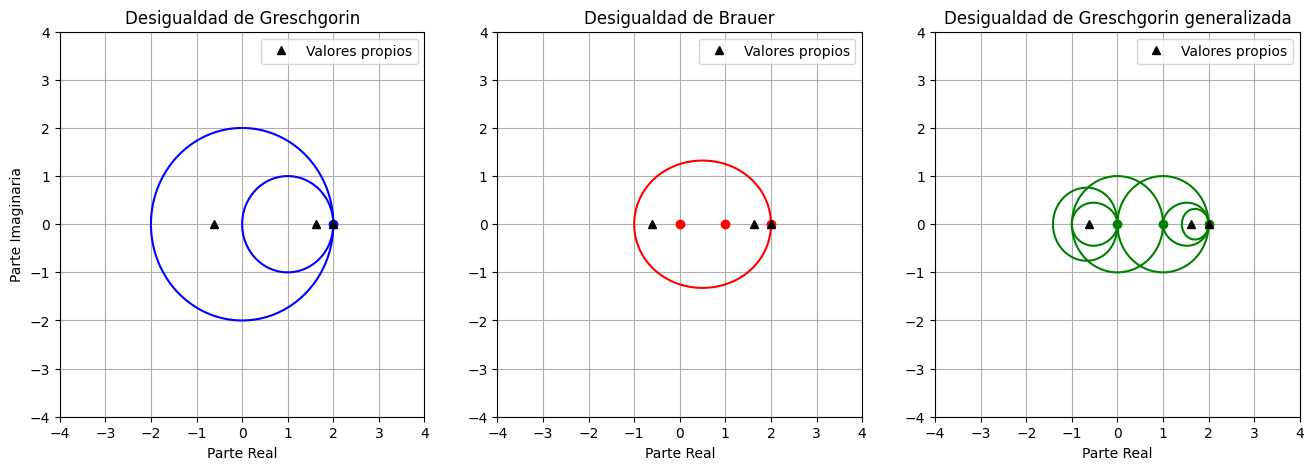

In [ ]:
def G1(x,y):
  return (x-1)**2+y**2-1
def G2(x,y):
  return x**2 +y**2 -4
def B1(x,y):
  return x**4 + 2*x**2 * y**2 +y**4 - 2*x**3 - 2*x*y**2+x**2+y**2-4
def O1(x,y):
  a = (x**2-y**2-x-1)**2 +(2*x*y-y)**2
  return a-1
def O2(x,y):
  a = (x**2-y**2-x-1)**2 +(2*x*y-y)**2
  b = (x-1)**2 + y**2
  return a-b
def O3(x,y):
  return x**2 +y**2 -1

r, k = 4, 500
x = np.linspace(-r, r, 400)
y = np.linspace(-r, r, 400)
x, y = np.meshgrid(x, y)



fig = plt.figure(figsize=(15,5))
plt.subplot(131)
plt.contour(x, y, G1(x,y), levels=[0], colors='b')
plt.contour(x, y, G2(x,y), levels=[0], colors='b')
plt.plot([2],[0],'bo')
E = np.linalg.eigvals(A)
plt.plot(np.real(E),np.imag(E),'k^',label ="Valores propios")
plt.xlim(-r,r)
plt.ylim(-r,r)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.title('Discos de Greschgorin')
plt.grid(True)
plt.legend()

plt.subplot(132)
plt.contour(x, y, B1(x,y), levels=[0], colors='r')
plt.plot([2,1,0],[0,0,0],'ro')
E = np.linalg.eigvals(A)
plt.plot(np.real(E),np.imag(E),'k^',label ="Valores propios")
plt.xlim(-r,r)
plt.ylim(-r,r)
plt.xlabel('Parte Real')
plt.title('Conjuntos de Brauer')
plt.grid(True)
plt.legend()

plt.subplot(133)
plt.contour(x, y, O1(x,y), levels=[0], colors='g')
plt.contour(x, y, O2(x,y), levels=[0], colors='g')
plt.contour(x, y, G1(x,y), levels=[0], colors='g')
plt.contour(x, y, O3(x,y), levels=[0], colors='g')
plt.plot([2,1,0],[0,0,0],'go')
E = np.linalg.eigvals(A)
plt.plot(np.real(E),np.imag(E),'k^',label ="Valores propios")
plt.xlim(-r,r)
plt.ylim(-r,r)
plt.xlabel('Parte Real')
plt.title('Conjuntos de Greschgorin generalizados')
plt.grid(True)
plt.legend()

plt.show()

# Ceros de polinomios

Para todo polinomio se puede definir la matriz compañera de la siguiente manera: Sea $p(x) = c_0 + c_1 x + \ldots + c_{n-1}x^{n-1} + x^{n}$ un polinomio en $ℝ[x]$, la matriz compañera se define como
$$
C(p(x)) = \begin{pmatrix}
0 & 0 & \ldots & 0 & -c_0\\
1 & 0 & \ldots & 0 & -c_1\\
0 & 1 & \ldots & 0 & -c_2\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
0 & 0 & \ldots & 1 & -c_{n-1}\\
\end{pmatrix}
$$
con $C(p(x)) \in \mathbb{R}^{n \times n }$. Con esta definición es fácil demostrar el siguiente resultado.

**Teorema 6 .** El polinomio característico de $C(p(x))$ es el polinomio $p(x)$.

Por ejemplo para el polinomio, $p(x) = (x-1)(x-2i)(x+2i) = x^3-x^2+4x-4$ la matriz de compañía es
$$
C(p(x)) = \begin{pmatrix}
0 & 0 & 4\\
1 & 0 & -4\\
0 & 1 & 1
\end{pmatrix}
$$

In [ ]:
def companionmatrix(coef):
    n = len(coef) - 1
    companion_matrix = np.zeros((n, n))
    for k in range(n-1):
      companion_matrix[k+1,k] = 1
    for k in range(n):
      companion_matrix[k, -1] = -coef[n-k] / coef[0]
    return(companion_matrix)
companionmatrix(np.array([1,-1,4,-4]))

array([[ 0.,  0.,  4.],
       [ 1.,  0., -4.],
       [ 0.,  1.,  1.]])

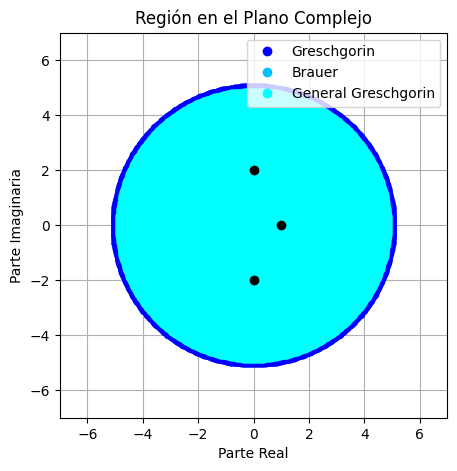

In [ ]:
alldisksforA(companionmatrix(np.array([1,-1,4,-4])),7,500)

**Teorema 7.** Un polinomio mónico de la forma $p(x) = c_0 + c_1 x + \ldots + c_{n-1}x^{n-1} + x^{n}$ con $p(x) \in ℂ[x]$ tiene todas sus raíces en el disco $D[0,1+|c_{n-1}|]$.

# Referencias

1. Melman, Aaron. «Generalizations of Gershgorin Disks and Polynomial Zeros». Proceedings of the American Mathematical Society, vol. 138, n.º 7, 2010. scite.ai, https://doi.org/10.1090/s0002-9939-10-10294-9.
2. Saad, Yousef. Iterative Methods for Sparse Linear Systems. Second, Society for Industrial and Applied Mathematics, 2003. DOI.org (Crossref), https://doi.org/10.1137/1.9780898718003.